In [156]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Data Source 
Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [157]:
# import data

dataset_columns = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rainfall','snowfall',
                   'functioning_day']

bike_df = pd.read_csv('./SeoulBikeData.csv')

In [158]:
#view data
bike_df.head()



,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [159]:
#drop columns we dont need
bike_df = bike_df.drop(['Date','Seasons', 'Holiday'], axis = 1)


#rename columns
bike_df.columns = dataset_columns

bike_df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rainfall,snowfall,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [160]:
#convert functional to zeros using map
map = {'Yes':1, 'No':0}

bike_df['functioning_day'] = bike_df['functioning_day'].map(map)
bike_df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rainfall,snowfall,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [161]:
# selected data to use for analysis
df_an = bike_df[bike_df['hour'] == 12]

In [162]:
#view the data
df_an.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rainfall,snowfall,functioning_day
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [163]:
#drop the columns
df_an = df_an.drop(['hour'], axis=1)
df_an.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rainfall,snowfall,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [164]:
#random function to select the particular hour and prepare the data fram for it

def prep_data(df, hour):
    #select the hours first into a new dataframe
    new_df = df[df['hour'] == hour].copy()
    #drop the hours column
    new_df = new_df.drop(['hour'], axis=1)
    
    return new_df

In [165]:
#testing 
filtered_df = prep_data(bike_df, 12)


In [166]:
filtered_df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rainfall,snowfall,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


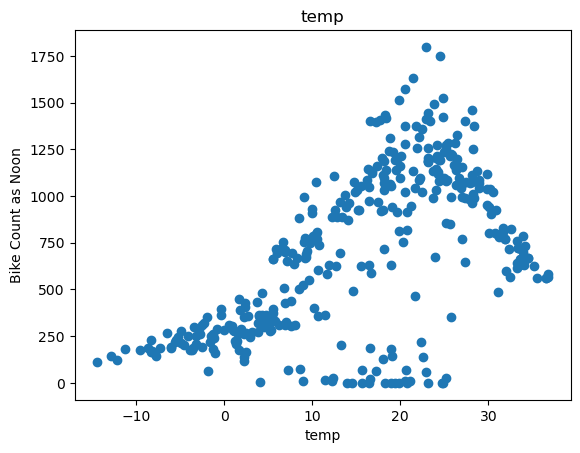

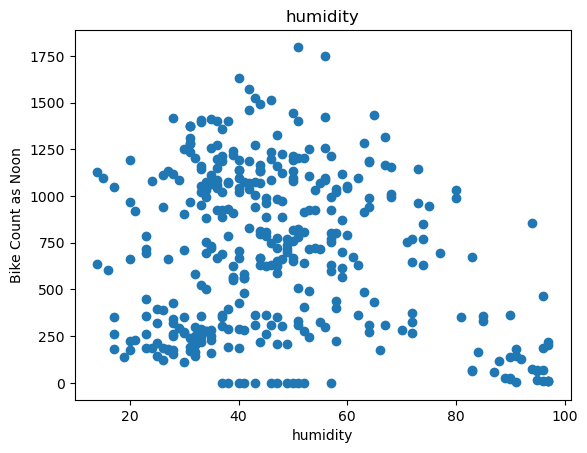

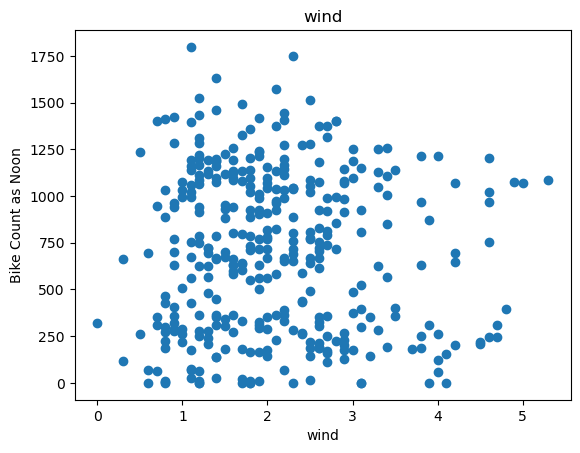

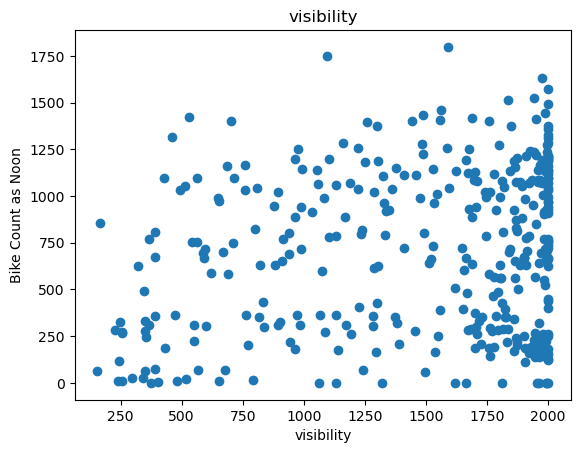

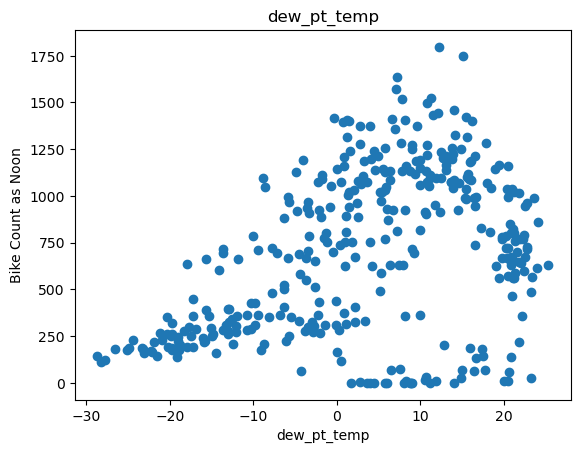

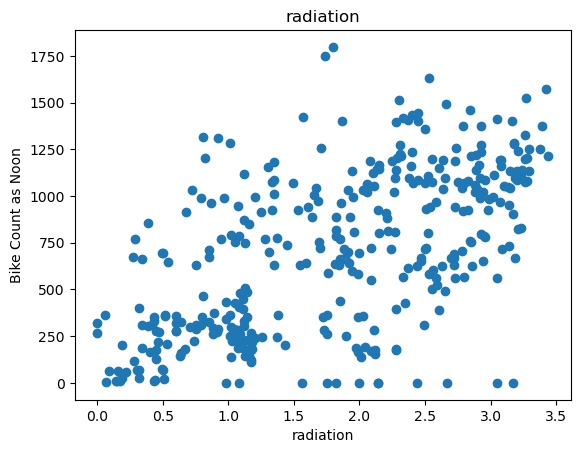

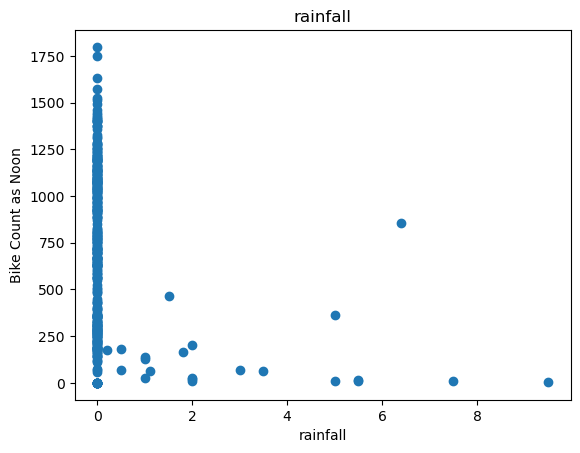

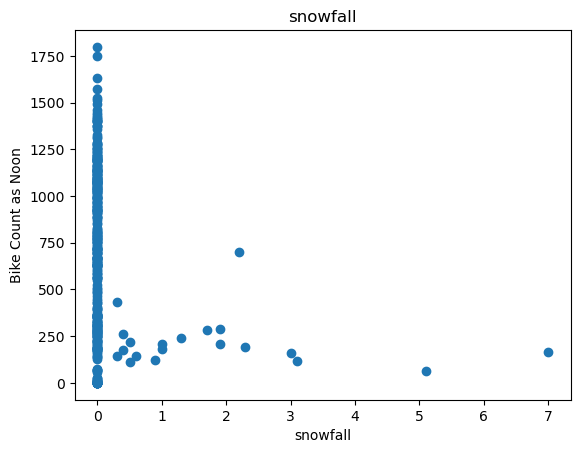

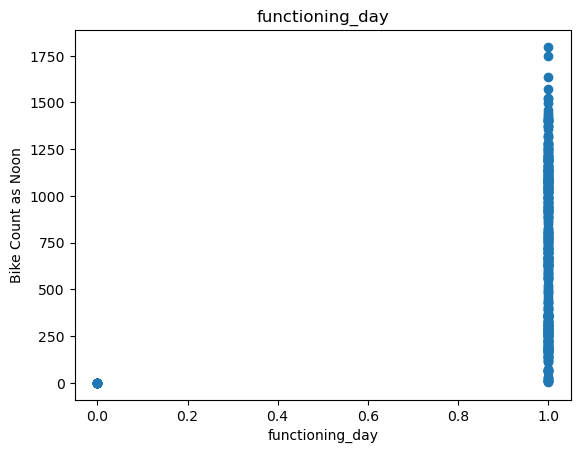

In [167]:
#plot the data to understand the relationship with the no of bikes 
for label in filtered_df.columns[1:]:
    plt.scatter(filtered_df[label], filtered_df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Count as Noon')
    plt.xlabel(label)
    plt.show()

We can see from the scatterplots above that the relationship of some columns do not show a strong correlation. We will drop those columns

In [168]:
df = filtered_df.drop(['wind','visibility','functioning_day'], axis=1)

In [169]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rainfall,snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#### Split data to train/valid/test set

In [170]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [171]:
def get_xy(dataframe, y_label, x_label=None):
    dataframe = copy.deepcopy(dataframe)
    
    if x_label is None:
        x = dataframe[[c for c in dataframe.columns if c!= y_label]].values
    else:
        if len(x_label) ==1:
            x = dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_label].values
    
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))
    
    return data, x, y

In [172]:
_, x_train_temp, y_train_temp = get_xy(train, 'bike_count', x_label=['temp'])
_, x_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_label=['temp'])
_, x_test_temp, y_test_temp = get_xy(test, 'bike_count', x_label=['temp'])

In [173]:
x_train_temp

array([[ 33.6],
       [  7. ],
       [ 26.4],
       [ 15.2],
       [  4.3],
       [ -9.6],
       [ 26.3],
       [ 16.8],
       [  5.3],
       [ 12.5],
       [ 17.4],
       [  9.8],
       [ 28.2],
       [ 13.9],
       [ 34.2],
       [ 23.1],
       [  1.1],
       [ 24.1],
       [ 25.8],
       [  9.1],
       [ 19.6],
       [ 28.2],
       [ -4.6],
       [ -5.6],
       [ -3.5],
       [ 28.3],
       [ 25.4],
       [ 14.1],
       [ -2.5],
       [ -4.1],
       [ 25.2],
       [  7.3],
       [ 21.4],
       [ -5.5],
       [ 30.1],
       [ 19.8],
       [ 33.8],
       [ 27.5],
       [ 31.9],
       [  5.5],
       [  3.2],
       [ 24.8],
       [ 16.7],
       [ -2. ],
       [  5.6],
       [ 25.2],
       [ 33.6],
       [ 22.2],
       [  2.5],
       [  8.1],
       [ 28.2],
       [ -3.4],
       [ -2.9],
       [ 26.3],
       [ 27.4],
       [ 29.8],
       [  2.2],
       [  1.5],
       [ 18. ],
       [ 20. ],
       [ 35.2],
       [  6.6],
       [

In [174]:
# create model
temp_reg = LinearRegression()

temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [175]:
print(temp_reg.coef_, temp_reg.intercept_, temp_reg.score(x_test_temp, y_test_temp))

[[20.39226404]] [352.91591342] 0.272400048639186


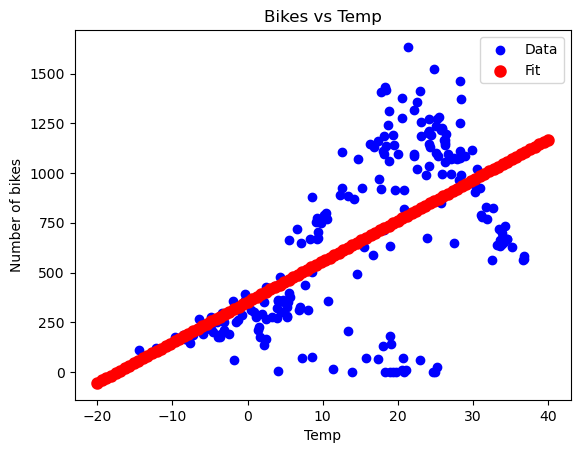

In [176]:
#plot scatter of the training data
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20,40,100)
plt.scatter(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidths=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [177]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, 'bike_count', x_label= df.columns[1:])
_, x_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_label= df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, 'bike_count', x_label= df.columns[1:])

In [178]:
all_reg = LinearRegression()

all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [179]:
print(all_reg.coef_, all_reg.intercept_, all_reg.score(x_test_all, y_test_all))

[[  3.31833822  -3.55929221  11.1695991  142.12333458 -89.55436966
  -64.47935194]] [517.07194913] 0.42976019000630716


#### Regression with a neural Net

In [180]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis =None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [181]:
temp_nn_model = tf.keras.Sequential(
[temp_normalizer,
tf.keras.layers.Dense(1)])

In [182]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [183]:
history = temp_nn_model.fit(
                            x_train_temp, y_train_temp, 
                            verbose=0, 
                            epochs = 1000, 
                            validation_data=(x_valid_temp,y_valid_temp ))

In [184]:
# plotting functions
def plot_loss(history):
    #fid, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

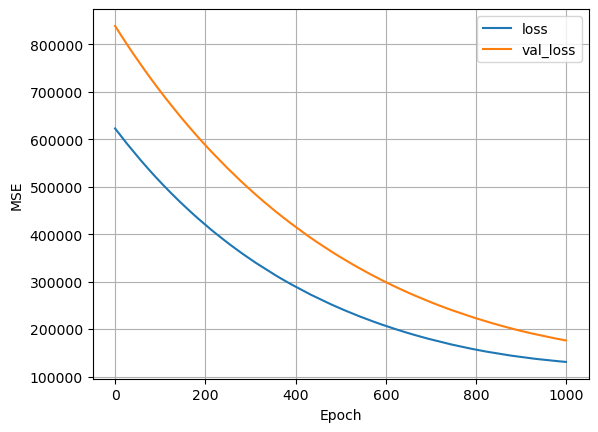

In [185]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


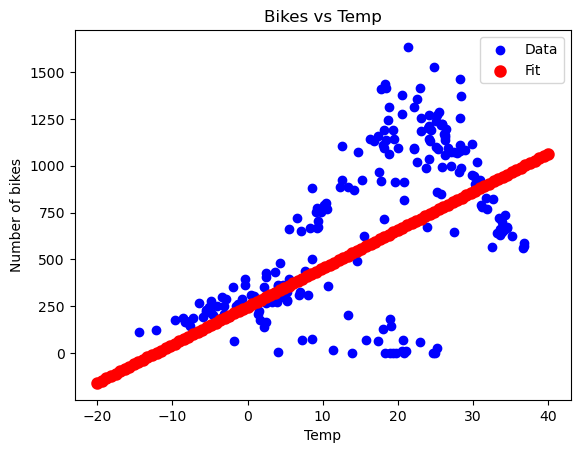

In [186]:
#plot scatter of the training data
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20,40,100)
plt.scatter(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidths=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

#### Neural Net

In [187]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis =None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model = tf.keras.Sequential(
                [temp_normalizer,
                 tf.keras.layers.Dense(32, activation='relu'),
                 tf.keras.layers.Dense(32, activation='relu'),
                 tf.keras.layers.Dense(1)
                    
                ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [194]:
history = nn_model.fit(
                            x_train_temp, y_train_temp, 
                            validation_data=(x_valid_temp,y_valid_temp ),
                            verbose=0, 
                            epochs = 100)

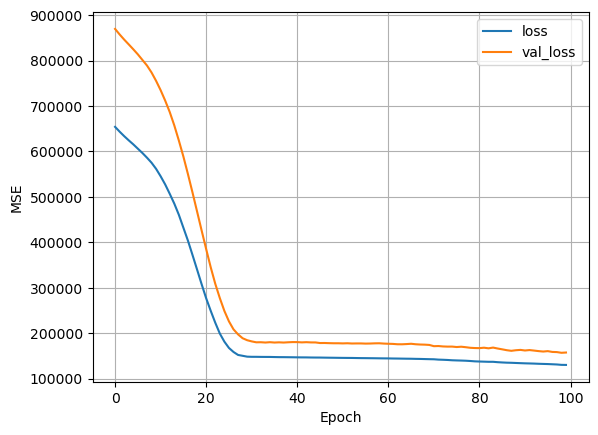

In [195]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


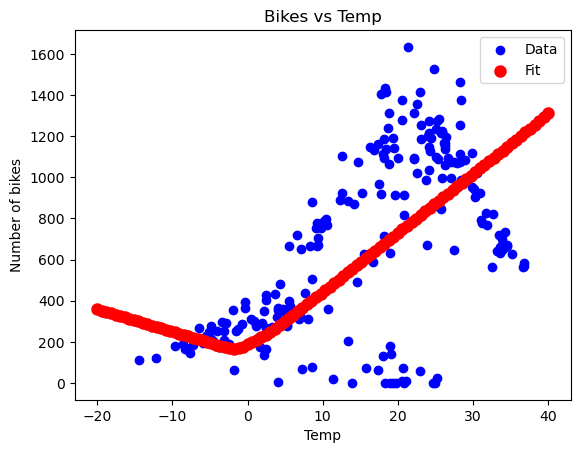

In [196]:
#plot scatter of the training data
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20,40,100)
plt.scatter(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidths=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

In [206]:
all_temp_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_temp_normalizer.adapt(x_train_all)

nn_model = tf.keras.Sequential(
                [all_temp_normalizer,
                 tf.keras.layers.Dense(32, activation='relu'),
                 tf.keras.layers.Dense(32, activation='relu'),
                 tf.keras.layers.Dense(1)
                    
                ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [207]:
history = nn_model.fit(
                            x_train_all, y_train_all, 
                            validation_data=(x_valid_all,y_valid_all ),
                            verbose=0, 
                            epochs = 100)

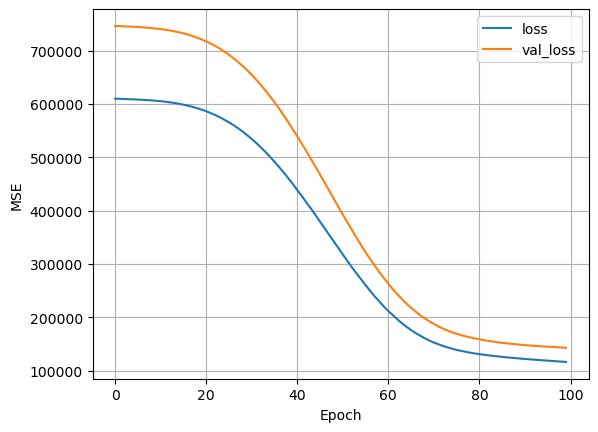

In [208]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


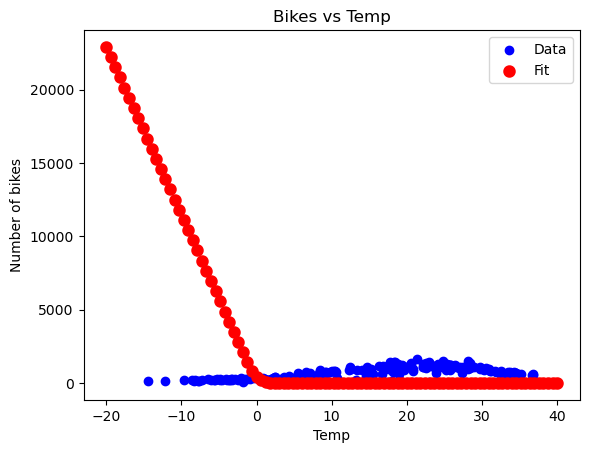

In [209]:
#plot scatter of the training data
plt.scatter(x_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20,40,100)
plt.scatter(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidths=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel("Temp")
plt.show()

In [210]:
#Calculate MSe for bpth lr and nn models
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 [==============================] - 0s 6ms/step


In [211]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [212]:
MSE(y_pred_lr, y_test_all)

121625.05883981267

In [213]:
MSE(y_pred_nn, y_test_all)

155332.44192410892

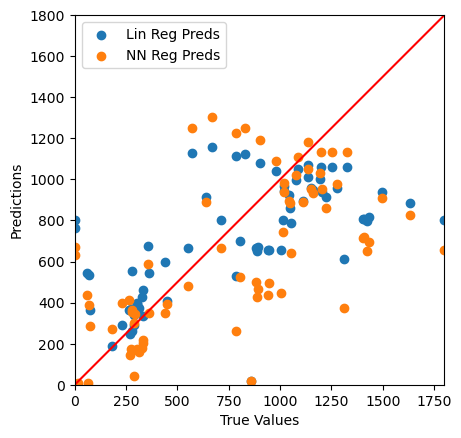

In [216]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='Lin Reg Preds')
plt.scatter(y_test_all, y_pred_nn, label='NN Reg Preds')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
#plt.show()
__ = plt.plot(lims, lims, c = 'red')